In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision import datasets
import torchvision.transforms as trans
from torch import nn
from torch import optim
from IPython.display import clear_output

In [ ]:
mnist = datasets.MNIST(root='mnist', download=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 15.7MB/s]


Extracting mnist/MNIST/raw/train-images-idx3-ubyte.gz to mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 478kB/s]


Extracting mnist/MNIST/raw/train-labels-idx1-ubyte.gz to mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.39MB/s]


Extracting mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 3.34MB/s]

Extracting mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to mnist/MNIST/raw



In [ ]:
train = datasets.MNIST(root='mnist', train=True, transform=trans.ToTensor())
test = datasets.MNIST(root='mnist', train=False, transform=trans.ToTensor())
train

Dataset MNIST
    Number of datapoints: 60000
    Root location: mnist
    Split: Train
    StandardTransform
Transform: ToTensor()

In [ ]:
test

Dataset MNIST
    Number of datapoints: 10000
    Root location: mnist
    Split: Test
    StandardTransform
Transform: ToTensor()

In [ ]:
model_try = nn.Sequential(
    nn.Flatten(start_dim=1),
    nn.Linear(in_features=28*28, out_features=784),
    nn.ReLU(),
    nn.Linear(in_features=784, out_features=784),
    nn.ReLU(),
    nn.Sigmoid(),
    nn.Linear(in_features=784, out_features=10),
)

In [ ]:
train[0][1]

5

In [ ]:
train_y = list()
for i in range(len(train)):
  train_y.append(train[i][1])

In [ ]:
train_x = list()
for i in range(len(train)):
  train_x.append(train[i][0])

In [ ]:
test_x = list()
for i in range(len(test)):
  test_x.append(test[i][0])

In [ ]:
test_y = list()
for i in range(len(test)):
  test_y.append(test[i][1])

In [ ]:
from torchsummary import summary

In [ ]:
summary(model_try, (1, 1, 28*28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                  [-1, 784]         615,440
              ReLU-3                  [-1, 784]               0
            Linear-4                  [-1, 784]         615,440
              ReLU-5                  [-1, 784]               0
           Sigmoid-6                  [-1, 784]               0
            Linear-7                   [-1, 10]           7,850
Total params: 1,238,730
Trainable params: 1,238,730
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.04
Params size (MB): 4.73
Estimated Total Size (MB): 4.76
----------------------------------------------------------------


In [ ]:
train_x[0].size()

torch.Size([1, 28, 28])

In [ ]:
with torch.no_grad():
    x, y = train_x[0], train_y[0]
    pred__ = model_try(x)
    print(pred__)
    pred__ = torch.argmax(pred__, dim=1) + 1
    #print(f'x = {x}')
    print(f'y_true = {y}')
    print(f'y_pred = {pred__.item()}')

tensor([[ 0.0047, -0.1340,  0.2077, -0.1710,  0.0208, -0.3372,  0.4738, -0.1092,
          0.0155,  0.5719]])
y_true = 5
y_pred = 10


In [ ]:
len(train_x[0])

1

In [ ]:
loss = nn.CrossEntropyLoss()

In [ ]:
optimizer = optim.SGD(model_try.parameters(), lr=1e-1)

In [ ]:
def run(model, dataloader, loss_function, optimizer=None):
    # set the model to evaluation or training mode
    if optimizer == None:
        model.eval()
    else:
        model.train()

    total_loss = 0

    for X, y in dataloader:
        # compute prediction
        pred = model(X)
        # compute loss
        loss = loss_function(pred, y)
        # save loss
        total_loss += loss.item()
        if optimizer != None:
            # compute gradients
            loss.backward()
            # do optimizer step
            optimizer.step()
            # clear gradients
            optimizer.zero_grad()

    return total_loss / len(dataloader)

In [ ]:
from IPython.display import clear_output

def show_losses(train_loss_hist, test_loss_hist):
    clear_output()

    plt.figure(figsize=(12,4))

    plt.subplot(1, 2, 1)
    plt.title('Train Loss')
    plt.plot(np.arange(len(train_loss_hist)), train_loss_hist)
    plt.yscale('log')
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.title('Test Loss')
    plt.plot(np.arange(len(test_loss_hist)), test_loss_hist)
    plt.yscale('log')
    plt.grid()

    plt.show()

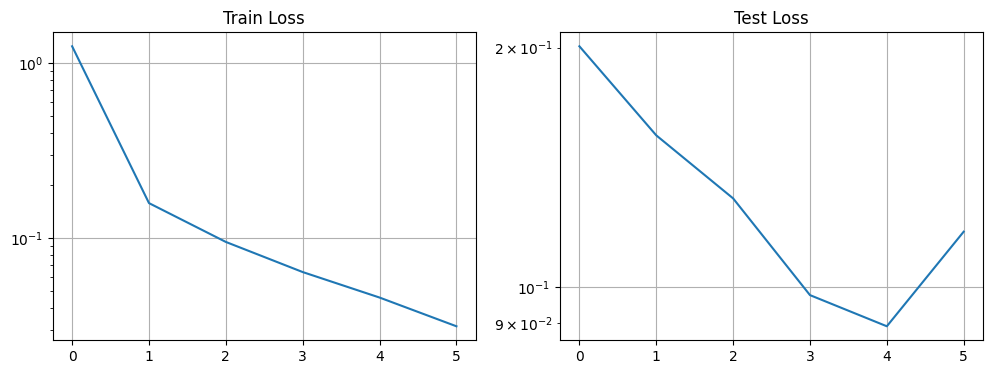

Best Epochs:  4


In [ ]:
BATCH_SIZE = 10
NUM_EPOCHS = 15

# your code here
train_loader = DataLoader(train, batch_size=BATCH_SIZE)
test_loader = DataLoader(test, batch_size=BATCH_SIZE)

train_loss_hist = []
test_loss_hist = []
prev_loss = 10 ** 9

for i in range(NUM_EPOCHS):
    train_loss = run(model_try, train_loader, loss, optimizer)
    train_loss_hist.append(train_loss)
    test_loss = run(model_try, test_loader, loss)
    test_loss_hist.append(test_loss)
    if i % 1 == 0:
        show_losses(train_loss_hist, test_loss_hist)
    if prev_loss < test_loss:
      print("Best Epochs: ", i - 1)
      break
    else:
      prev_loss = test_loss

Как можно заметить наилучшее значение эпох это 4. Обучим аналогичную модель представленной выше на 6-ти эпохах, и посмотрим на ее ключевые метрики, а затем попробуем сделать изменения архитектуры.

In [ ]:
model_bases = nn.Sequential(
    nn.Flatten(start_dim=1),
    nn.Linear(in_features=28*28, out_features=784),
    nn.ReLU(),
    nn.Linear(in_features=784, out_features=784),
    nn.ReLU(),
    nn.Sigmoid(),
    nn.Linear(in_features=784, out_features=10),
)

In [ ]:
optimizer = optim.SGD(model_bases.parameters(), lr=1e-1)

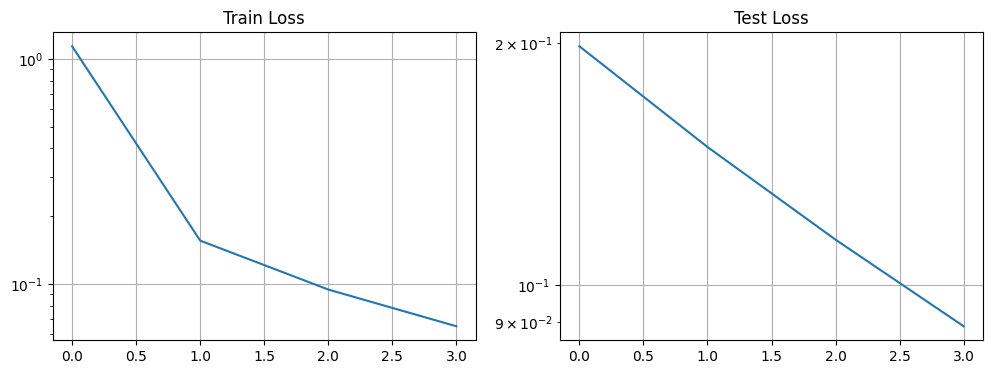

In [ ]:
Batch = 10
Epochs = 4

train_loader = DataLoader(train, batch_size=Batch)
test_loader = DataLoader(test, batch_size=Batch)

train_loss_hist = []
test_loss_hist = []

for i in range(Epochs):
  train_loss = run(model_bases, train_loader, loss, optimizer)
  train_loss_hist.append(train_loss)
  test_loss = run(model_bases, test_loader, loss)
  test_loss_hist.append(test_loss)
  show_losses(train_loss_hist, test_loss_hist)

In [ ]:
test_loss = run(model_try, test_loader, loss)

In [ ]:
test_loss

0.11733613637774579

In [ ]:
test_loss = run(model_bases, test_loader, loss)

In [ ]:
test_loss

0.08890286663649385

In [ ]:
def run_test(model, dataloader, loss_function, optimizer=None):
    if optimizer == None:
        model.eval()
    else:
        model.train()

    total_loss = 0
    min_loss = 10**9

    for X, y in dataloader:
        pred = model(X)
        loss = loss_function(pred, y)
        total_loss += loss.item()
        if loss < min_loss:
          min_loss = loss


    print(total_loss / len(dataloader))
    return min_loss

In [ ]:
test_losses = run_test(model_bases, test_loader, loss)
test_losses

0.08890286663649385


tensor(2.0921e-05, grad_fn=<NllLossBackward0>)

In [ ]:
test_losses.item()

2.0920720999129117e-05

In [ ]:
def accuracy(model, dataloader, loss_function, optimizer=None):
    if optimizer == None:
        model.eval()
    else:
        model.train()

    cnt = 0
    all = 0

    for X, y in dataloader:
        pred = model(X)
        for i in range(len(y)):
          x1 = -10 ** 9
          num = -1
          for j in range(len(pred[i])):
            if pred[i][j] > x1:
              x1 = pred[i][j]
              num = j
          y1 = y[i]
          if num == y1:
            cnt+=1
          all+=1

    accuracy = cnt / all
    return accuracy

In [ ]:
acc = accuracy(model_bases, test_loader, loss)
acc

0.9743

In [ ]:
from sklearn.metrics import precision_score, recall_score

In [ ]:
def prep_metrics(model, dataloader):
  model.eval()
  true = []
  pred = []

  for x, y in dataloader:
    pred_y = model(x)
    _, predicted = torch.max(pred_y.data, 1)
    true.extend(y.cpu().numpy())
    pred.extend(predicted.cpu().numpy())
  return precision_score(true, pred, average='weighted'), recall_score(true, pred, average='weighted')

In [ ]:
precision, recall = prep_metrics(model_bases, test_loader)

In [ ]:
precision

0.9744635900673299

In [ ]:
recall

0.9743

In [ ]:
(2 * precision * recall) / (precision + recall)

0.9743817881673343

Первая модель имеет достаточно высокие показатели на ключ. метриках

Сделаем модель с большим количеством слоев

In [ ]:
model_with_more = nn.Sequential(
    nn.Flatten(start_dim=1),
    nn.Linear(in_features=28*28, out_features=784),
    nn.Dropout(p=0.2),
    nn.ReLU(),
    nn.Linear(in_features=784, out_features=550),
    nn.ReLU(),
    nn.Dropout(p=0.2),
    nn.Linear(in_features=550, out_features=690),
    nn.Tanh(),
    nn.Linear(in_features=690, out_features=280),
    nn.Sigmoid(),
    nn.Linear(in_features=280, out_features=290),
    nn.ReLU(),
    nn.Linear(in_features=290, out_features=300),
    nn.Sigmoid(),
    nn.Linear(in_features=300, out_features=100),
    nn.Tanh(),
    nn.Linear(in_features=100, out_features=10),
)

In [ ]:
summary(model_with_more, (1, 1, 28*28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                  [-1, 784]         615,440
           Dropout-3                  [-1, 784]               0
              ReLU-4                  [-1, 784]               0
            Linear-5                  [-1, 550]         431,750
              ReLU-6                  [-1, 550]               0
           Dropout-7                  [-1, 550]               0
            Linear-8                  [-1, 690]         380,190
              Tanh-9                  [-1, 690]               0
           Linear-10                  [-1, 280]         193,480
          Sigmoid-11                  [-1, 280]               0
           Linear-12                  [-1, 290]          81,490
             ReLU-13                  [-1, 290]               0
           Linear-14                  [

In [ ]:
optimizer = optim.SGD(model_with_more.parameters(), lr=1e-1)

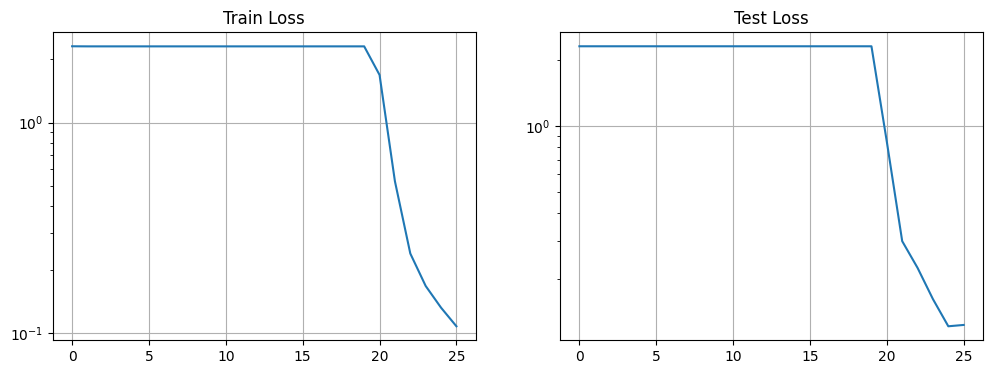

Best Epochs:  24


In [ ]:
BATCH_SIZE = 10
NUM_EPOCHS = 40

train_loader = DataLoader(train, batch_size=BATCH_SIZE)
test_loader = DataLoader(test, batch_size=BATCH_SIZE)

train_loss_hist = []
test_loss_hist = []
prev_loss = 10 ** 9

for i in range(NUM_EPOCHS):
    train_loss = run(model_with_more, train_loader, loss, optimizer)
    train_loss_hist.append(train_loss)
    test_loss = run(model_with_more, test_loader, loss)
    test_loss_hist.append(test_loss)
    if i % 1 == 0:
        show_losses(train_loss_hist, test_loss_hist)
    if prev_loss < test_loss:
      print("Best Epochs: ", i - 1)
      break
    else:
      prev_loss = test_loss

In [ ]:
test_losses = run_test(model_with_more, test_loader, loss)
test_losses

0.12373543675336987


tensor(0.0023, grad_fn=<NllLossBackward0>)

In [ ]:
test_losses.item()

0.0023184779565781355

In [ ]:
acc = accuracy(model_with_more, test_loader, loss)
acc

0.9695

In [ ]:
precision, recall = prep_metrics(model_with_more, test_loader)

In [ ]:
precision

0.9699690851487103

In [ ]:
recall

0.9695

In [ ]:
(2 * precision * recall) / (precision + recall)

0.9697344858472647

Модель не такая хорошая как первая, но все же имеет почти такие же значения метрик. Я хочу попробовать сильно уменьшить значения параметров и посмотреть на результаты модели.

In [ ]:
model_low_numb = nn.Sequential(
    nn.Flatten(start_dim=1),
    nn.Linear(in_features=28*28, out_features=10),
    nn.Dropout(p=0.2),
    nn.ReLU(),
    nn.Linear(in_features=10, out_features=5),
    nn.ReLU(),
    nn.Dropout(p=0.2),
    nn.Linear(in_features=5, out_features=5),
    nn.Tanh(),
    nn.Linear(in_features=5, out_features=5),
    nn.Sigmoid(),
    nn.Linear(in_features=5, out_features=5),
    nn.ReLU(),
    nn.Linear(in_features=5, out_features=3),
    nn.Sigmoid(),
    nn.Linear(in_features=3, out_features=2),
    nn.Tanh(),
    nn.Linear(in_features=2, out_features=10),
)

In [ ]:
summary(model_low_numb, (1, 1, 28*28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                   [-1, 10]           7,850
           Dropout-3                   [-1, 10]               0
              ReLU-4                   [-1, 10]               0
            Linear-5                    [-1, 5]              55
              ReLU-6                    [-1, 5]               0
           Dropout-7                    [-1, 5]               0
            Linear-8                    [-1, 5]              30
              Tanh-9                    [-1, 5]               0
           Linear-10                    [-1, 5]              30
          Sigmoid-11                    [-1, 5]               0
           Linear-12                    [-1, 5]              30
             ReLU-13                    [-1, 5]               0
           Linear-14                   

In [ ]:
optimizer = optim.SGD(model_low_numb.parameters(), lr=1e-1)

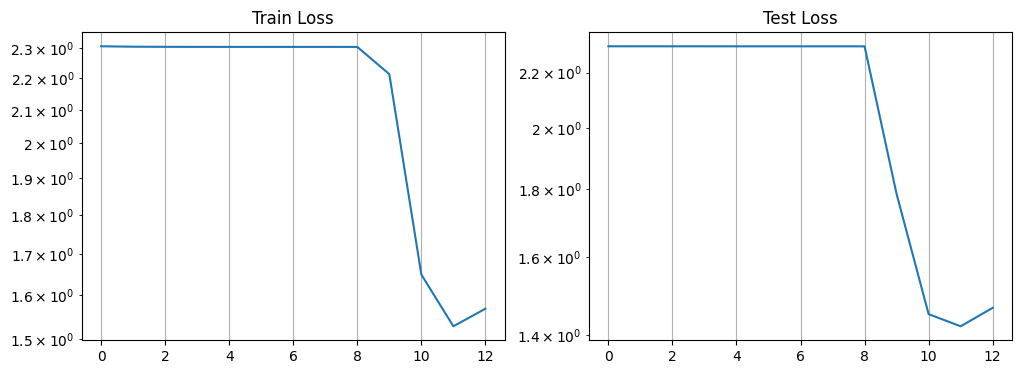

Best Epochs:  11


In [ ]:
BATCH_SIZE = 10
NUM_EPOCHS = 250

train_loader = DataLoader(train, batch_size=BATCH_SIZE)
test_loader = DataLoader(test, batch_size=BATCH_SIZE)

train_loss_hist = []
test_loss_hist = []
prev_loss = 10 ** 9

for i in range(NUM_EPOCHS):
    train_loss = run(model_low_numb, train_loader, loss, optimizer)
    train_loss_hist.append(train_loss)
    test_loss = run(model_low_numb, test_loader, loss)
    test_loss_hist.append(test_loss)
    if i % 1 == 0:
        show_losses(train_loss_hist, test_loss_hist)
    if prev_loss < test_loss:
      print("Best Epochs: ", i - 1)
      break
    else:
      prev_loss = test_loss

In [ ]:
test_losses = run_test(model_low_numb, test_loader, loss)
test_losses

1.4667126318812371


tensor(0.9933, grad_fn=<NllLossBackward0>)

In [ ]:
test_losses.item()

0.9932869076728821

In [ ]:
acc = accuracy(model_low_numb, test_loader, loss)
acc

0.3777

In [ ]:
precision, recall = prep_metrics(model_low_numb, test_loader)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
precision

0.2510332028082054

In [ ]:
recall

0.3777

In [ ]:
(2 * precision * recall) / (precision + recall)

0.3016072326932049

Можно заметить, что параметры влияют на качество полученной модели.

Сейчас я хочу к лучшей модели (1), добавить BatchNorm и Dropout.

In [ ]:
model_bases_upd = nn.Sequential(
    nn.Flatten(start_dim=1),
    nn.Linear(in_features=28*28, out_features=784),
    nn.BatchNorm1d(784),
    nn.ReLU(),
    nn.Linear(in_features=784, out_features=784),
    nn.BatchNorm1d(784),
    nn.Dropout(p=0.2),
    nn.ReLU(),
    nn.Sigmoid(),
    nn.Linear(in_features=784, out_features=10),
)

In [ ]:
summary(model_bases_upd, (1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                  [-1, 784]         615,440
       BatchNorm1d-3                  [-1, 784]           1,568
              ReLU-4                  [-1, 784]               0
            Linear-5                  [-1, 784]         615,440
       BatchNorm1d-6                  [-1, 784]           1,568
           Dropout-7                  [-1, 784]               0
              ReLU-8                  [-1, 784]               0
           Sigmoid-9                  [-1, 784]               0
           Linear-10                   [-1, 10]           7,850
Total params: 1,241,866
Trainable params: 1,241,866
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.05
Params size (MB): 4.74
Estimat

In [ ]:
optimizer = optim.SGD(model_bases_upd.parameters(), lr=1e-1)

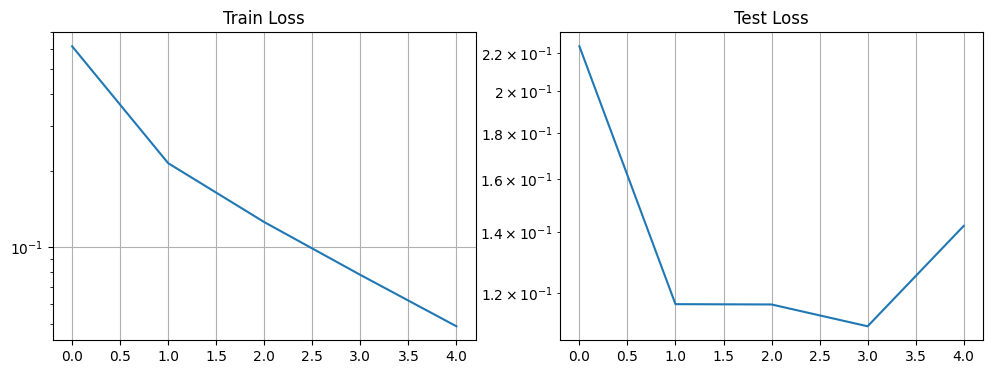

Best Epochs:  3


In [ ]:
BATCH_SIZE = 10
NUM_EPOCHS = 40

train_loader = DataLoader(train, batch_size=BATCH_SIZE)
test_loader = DataLoader(test, batch_size=BATCH_SIZE)

train_loss_hist = []
test_loss_hist = []
prev_loss = 10 ** 9

for i in range(NUM_EPOCHS):
    train_loss = run(model_bases_upd, train_loader, loss, optimizer)
    train_loss_hist.append(train_loss)
    test_loss = run(model_bases_upd, test_loader, loss)
    test_loss_hist.append(test_loss)
    if i % 1 == 0:
        show_losses(train_loss_hist, test_loss_hist)
    if prev_loss < test_loss:
      print("Best Epochs: ", i - 1)
      break
    else:
      prev_loss = test_loss

In [ ]:
test_losses = run_test(model_bases_upd, test_loader, loss)
test_losses

0.14219279153432476


tensor(2.0266e-07, grad_fn=<NllLossBackward0>)

In [ ]:
test_losses.item()

2.026556842338323e-07

In [ ]:
acc = accuracy(model_bases_upd, test_loader, loss)
acc

0.9621

In [ ]:
precision, recall = prep_metrics(model_bases_upd, test_loader)

In [ ]:
precision

0.9646173673148214

In [ ]:
recall

0.9621

In [ ]:
(2 * precision * recall) / (precision + recall)

0.9633570391146498

Можно заметить, что показатели на метриках не очень значительно ухудшились, но модель начала обучаться гораздо быстрее, и это позволяет повысить количество параметров.

**ВЫВОД**

Таблица результатов моделей - https://docs.google.com/spreadsheets/d/19RmZq1vyapwrzosvWmQjlG1m16V2YkoVaLkgdHWVIes/edit?usp=sharing

Лучшая модель по данной таблице - модель 1. (model_bases)

У меня объяснение такое, модель содержит достаточно большое количество параметров, а также нелинейные функции активации, также в ней не используется BatchNorm1d, который бы заметно уменьшил время обучения, но чуть бы сказался на точности, хотя это позволяет нам использовать большее количество параметров. Хотя можно заметить, что использование большого количества параметров, много слоев, и Dropout не всегда хорошо влияют на модель, ее значения могут чуть ухудшится, скорее всего потому что возможно не очень хорошо подобраны некоторые функции активации, либо же слишком большое количество параметров, или dropout в данном случае влияет на нашу точность.